In [1]:
import theano
from theano import tensor as T

In [2]:
x1 = T.scalar()
w1 = T.scalar()
w0 = T.scalar()
z1 = w1 * x1 + w0

In [3]:
net_input = theano.function(inputs=[w1, x1, w0], outputs=z1)

In [4]:
net_input(2.0, 1.0, 0.5)

array(2.5)

In [5]:
print(theano.config.floatX)

float64


In [6]:
theano.config.floatX = 'float32'

In [7]:
print(theano.config.device)

cpu


In [8]:
import numpy as np

In [9]:
x = T.fmatrix(name='x')

In [10]:
x_sum = T.sum(x, axis=0)

In [11]:
calc_sum = theano.function(inputs=[x], outputs=x_sum)

In [12]:
ary = [[1,2,3], [1,2,3]]

In [13]:
print('Column sum:', calc_sum(ary))

Column sum: [ 2.  4.  6.]


In [14]:
ary = np.array([[1,2,3], [1,2,3]], dtype=theano.config.floatX)

In [15]:
print('Column sum:', calc_sum(ary))

Column sum: [ 2.  4.  6.]


In [16]:
x = T.fmatrix(name='x')

In [17]:
w = theano.shared(np.asarray([[0.0,0.0,0.0]], dtype=theano.config.floatX))

In [18]:
z = x.dot(w.T)

In [19]:
update = [[w, w+1.0]]

In [20]:
net_input = theano.function(inputs=[x], updates=update, outputs=z)

In [21]:
data = np.array([[1,2,3]], dtype=theano.config.floatX)

In [22]:
for i in range(5):
    print('z%d:' % i, net_input(data))

z0: [[ 0.]]
z1: [[ 6.]]
z2: [[ 12.]]
z3: [[ 18.]]
z4: [[ 24.]]


In [23]:
data = np.array([[1,2,3]], dtype=theano.config.floatX)

In [24]:
x = T.fmatrix('x')

In [25]:
w = theano.shared(np.asarray([[0.0, 0.0, 0.0]], dtype=theano.config.floatX))

In [26]:
z = x.dot(w.T)

In [27]:
update = [[w, w+1.0]]

In [28]:
net_input = theano.function(inputs=[], updates=update,givens={x: data}, outputs=z)

In [29]:
for i in range(5):
    print('z%d:' % i, net_input())

z0: [[ 0.]]
z1: [[ 6.]]
z2: [[ 12.]]
z3: [[ 18.]]
z4: [[ 24.]]


In [30]:
import numpy as np
X_train = np.asarray([[0.0], [1.0], [2.0], [3.0], [4.0],
                      [5.0], [6.0], [7.0], [8.0], [9.0]], 
                     dtype=theano.config.floatX)

y_train = np.asarray([1.0, 1.3, 3.1, 2.0, 5.0, 
                      6.3, 6.6, 7.4, 8.0, 9.0], 
                     dtype=theano.config.floatX)

In [31]:
import theano
from theano import tensor as T
import numpy as np

def train_linreg(X_train, y_train, eta, epochs):
    costs = []
    eta0 = T.fscalar('eta0')
    y = T.fvector(name='y')
    X = T.fmatrix(name='X')
    w = theano.shared(np.zeros(shape=(X_train.shape[1] + 1), dtype=theano.config.floatX), name='w')
    net_input = T.dot(X, w[1:]) + w[0]
    errors = y - net_input
    cost = T.sum(T.pow(errors, 2))
    
    gradient = T.grad(cost, wrt=w)
    update = [(w, w - eta0 * gradient)]
    
    train = theano.function(inputs=[eta0], outputs=cost, updates=update, givens={X: X_train, y:y_train})
    for _ in range(epochs):
        costs.append(train(eta))
    
    return costs, w

In [32]:
import matplotlib.pyplot as plt

In [33]:
costs, w = train_linreg(X_train, y_train, eta=0.001, epochs=10)

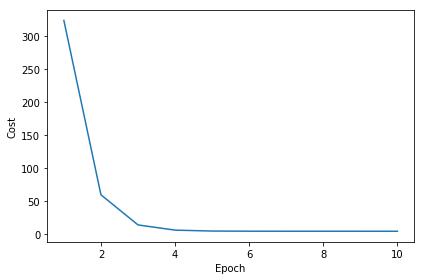

In [34]:
plt.plot(range(1, len(costs)+1), costs)

plt.tight_layout()
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.tight_layout()
# plt.savefig('./figures/cost_convergence.png', dpi=300)
plt.show()


In [35]:
def predict_linreg(X, w):
    Xt = T.matrix(name='X')
    net_input = T.dot(Xt, w[1:]) + w[0]
    predict = theano.function(inputs=[Xt], givens={w: w}, outputs=net_input)
    return predict(X)

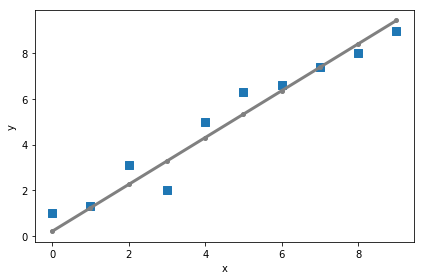

In [36]:
plt.scatter(X_train, y_train, marker='s', s=50)
plt.plot(range(X_train.shape[0]), 
         predict_linreg(X_train, w), 
         color='gray', 
         marker='o', 
         markersize=4, 
         linewidth=3)

plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
# plt.savefig('./figures/linreg.png', dpi=300)
plt.show()


In [37]:
X = np.array([[1, 1.4, 1.5]])
w = np.array([0.0, 0.2, 0.4])

def net_input(X, w):
    z = X.dot(w)
    return z

def logistic(z):
    return 1.0 / (1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w)[0])

P(y=1|x) = 0.707


In [38]:
W = np.array([[1.1, 1.2, 1.3, 0.5],
              [0.1, 0.2, 0.4, 0.1],
              [0.2, 0.5, 2.1, 1.9]])

In [39]:
A = np.array([[1.0], 
              [0.1], 
              [0.3], 
              [0.7]])

In [40]:
Z = W.dot(A)

In [41]:
y_probas = logistic(Z)

In [42]:
print('Probabilities:\n', y_probas)

Probabilities:
 [[ 0.87653295]
 [ 0.57688526]
 [ 0.90114393]]


In [43]:
y_class = np.argmax(Z, axis=0)

In [44]:
print('predicted class label: %d' % y_class[0])

predicted class label: 2


In [45]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

In [46]:
def softmax_activation(X, w):
    z = net_input(X, w)
    return softmax(z)

In [47]:
y_probas = softmax(Z)

In [48]:
print('Probabilities:\n', y_probas)

Probabilities:
 [[ 0.40386493]
 [ 0.07756222]
 [ 0.51857284]]


In [49]:
y_probas.sum()

1.0

In [50]:
def tanh(z):
    e_p = np.exp(z) 
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

In [51]:
import matplotlib.pyplot as plt

z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)

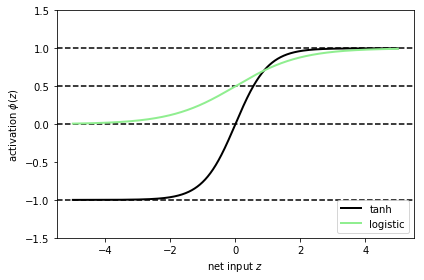

In [52]:
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation $\phi(z)$')
plt.axhline(1, color='black', linestyle='--')
plt.axhline(0.5, color='black', linestyle='--')
plt.axhline(0, color='black', linestyle='--')
plt.axhline(-1, color='black', linestyle='--')

plt.plot(z, tanh_act, 
         linewidth=2, 
         color='black', 
         label='tanh')
plt.plot(z, log_act, 
         linewidth=2, 
         color='lightgreen', 
         label='logistic')

plt.legend(loc='lower right')
plt.tight_layout()
# plt.savefig('./figures/activation.png', dpi=300)
plt.show()


In [53]:
tanh_act = np.tanh(z)

In [54]:
from scipy.special import expit

In [55]:
log_act = expit(z)